In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
session = Session(engine)

In [7]:
data = session.query(Measurement).filter(Measurement.date.between("2017-01-01","2017-12-31"))

In [129]:
data_dict = []
for row in data:
    data_list = {}
    data_list["date"] = row.date
    data_list["prcp"] = row.prcp
    data_dict.append(data_list)
    

In [8]:
date_item = [row.date for row in data]
prcp_item = [row.prcp for row in data]
rain = pd.DataFrame({
    "Percp":prcp_item,
}, index = date_item)

In [11]:
rain.describe()

,Percp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


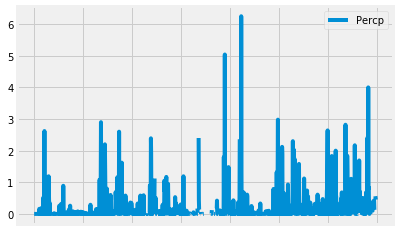

In [107]:
rain.plot()

In [116]:
sec_row = session.query(Measurement).first()
sec_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x117b0a6a0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [14]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10933a6a0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [25]:
# of stations in set
session.query(Station).count()

9

In [62]:
#active stations
session.query(
    Measurement.station,
    func.count(Measurement.station)
).group_by(
    Measurement.station
).order_by(
    func.count(Measurement.station).desc()
).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [91]:
session.query(
    #Measurement.station,
    func.avg(Measurement.tobs),
    func.min(Measurement.tobs),
    func.max(Measurement.tobs)
).filter(
    Measurement.station  == "USC00518838"
).all()

[(72.72407045009784, 58.0, 83.0)]

In [99]:
tobs = session.query(
    Measurement.station,
    func.count(Measurement.tobs)
).group_by(Measurement.station
).all()

In [103]:
import seaborn as sns
%matplotlib inline

In [100]:
#data = session.query(Measurement).filter(Measurement.date.between("2017-01-01","2017-12-31"))
station = [row.station for row in data]
tobs = [row.tobs for row in data]
temp = pd.DataFrame({
    "Station":station,
    "Temp":tobs,
})

/Users/teashamccoy/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


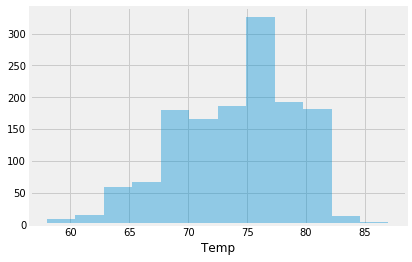

In [106]:
sns.distplot(temp["Temp"], kde=False, bins=12)